# Predicting Diabetes with Python
## End-to-EndMachine Learning Model

### Part I : Data Collection and Cleaning

- Collect diabetes data from Repository
- Replace Yes/Positive with 1 and No/Negative with 0
- Uniformize column names
- Export clean csv file

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# stats libraries
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest

In [2]:
database_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv"

In [3]:
df = pd.read_csv(database_link)

In [4]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [5]:
# replace the values in the df with 0's and 1's
df = df.replace("No", 0).replace("Yes",1).replace("Positive", 1).replace("Negative",0)
# gender column will be isMale

df = df.replace("Male",1).replace("Female",0)

In [6]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [7]:
# check for missing values
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [8]:
#check dtypes of the columns
df.dtypes

Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object

In [9]:
#correcting column names
replace = {"Gender":"ismale"}

df.rename(columns=replace)

df.columns.str.lower()

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden weight loss',
       'weakness', 'polyphagia', 'genital thrush', 'visual blurring',
       'itching', 'irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [10]:
df.columns = df.columns.str.lower()
df

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [11]:
#turn into csv
df.to_csv('diabetes_data_clean.csv', index=None)

## Part II - Exploratory Data Analysis

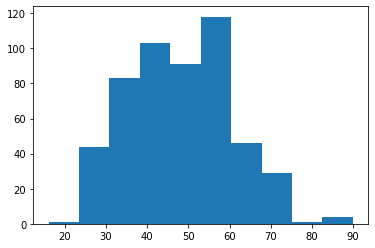

In [12]:
#examine ages
plt.hist(df['age']);

In [13]:
print(df['age'].mean())
print(df['age'].median())

48.02884615384615
47.5


/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


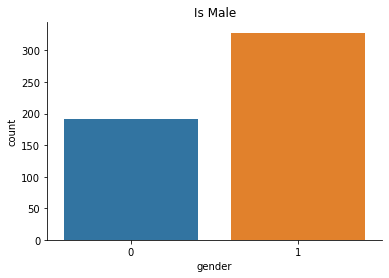

In [14]:
#create countplot for ismale
sns.countplot(df['gender'])
plt.title('Is Male')
sns.despine()

/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


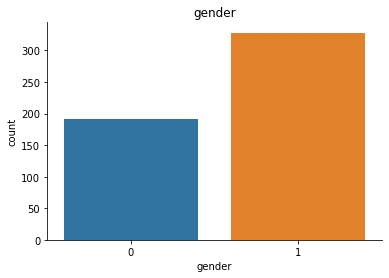

/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


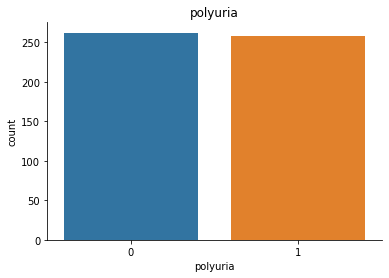

/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


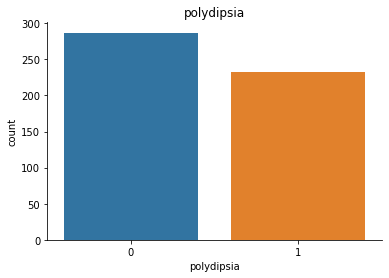

/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


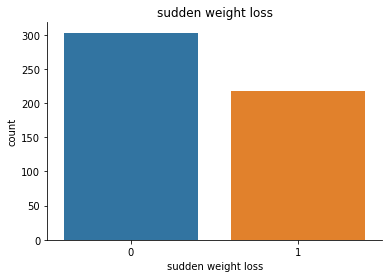

/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


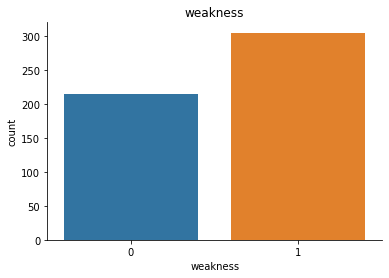

/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


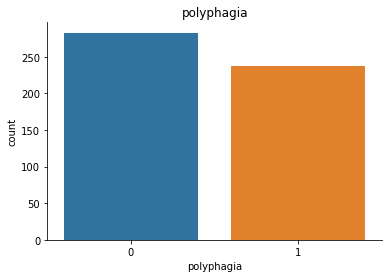

/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


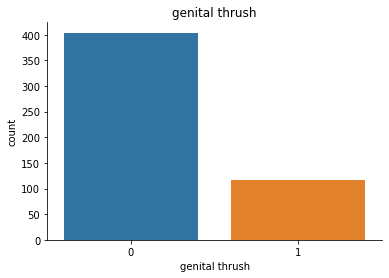

/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


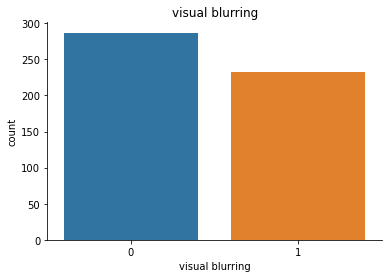

/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


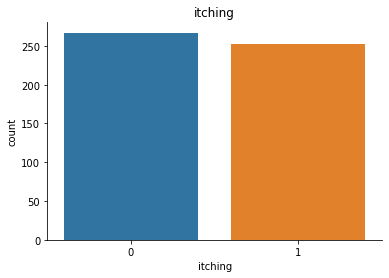

/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


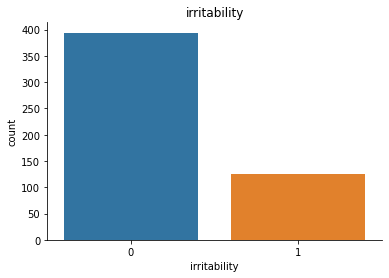

/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


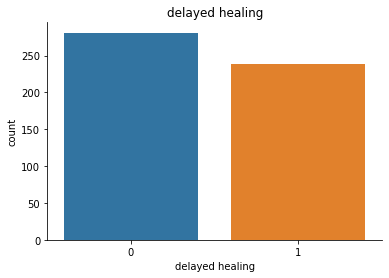

/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


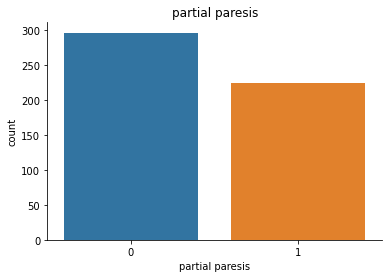

/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


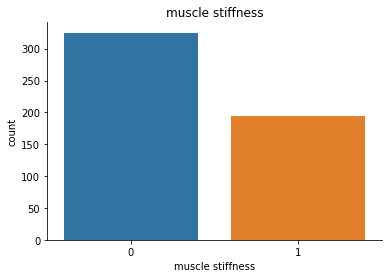

/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


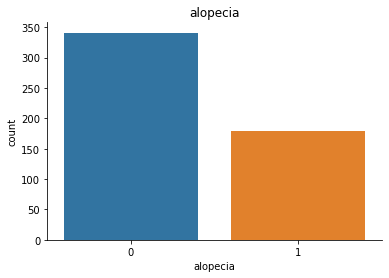

/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


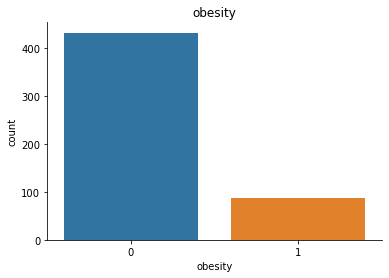

/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


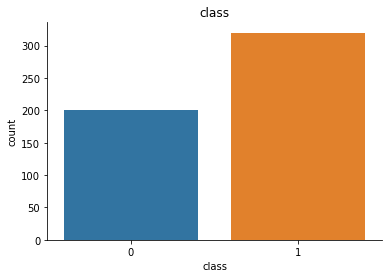

In [15]:
columns = df.columns[1:]

for column in columns:
    sns.countplot(df[column])
    plt.title(column)
    sns.despine()
    plt.show();

#### Questions:
1. Is obesity related to diabetes status?
2. Is age related to diabetes status

In [16]:
#Obesity
obesity_diabetes_crosstab = pd.crosstab(df['class'], df['obesity'])

In [17]:
chi2_contingency(obesity_diabetes_crosstab)

(2.3274739583333344,
 0.12710799319896815,
 1,
 array([[166.15384615,  33.84615385],
        [265.84615385,  54.15384615]]))

In [18]:
# Gender
ismale_diabetes_crosstab = pd.crosstab(df['class'], df['gender'])
ismale_diabetes_crosstab

gender,0,1
class,,
0,19,181
1,173,147


In [19]:
chi2_contingency(ismale_diabetes_crosstab)

(103.03685927972558,
 3.289703730553317e-24,
 1,
 array([[ 73.84615385, 126.15384615],
        [118.15384615, 201.84615385]]))

In [20]:
#polyuria
polyuria_diabetes_crosstab = pd.crosstab(df['class'], df['polyuria'])
chi2_contingency(polyuria_diabetes_crosstab)

(227.86583895496773,
 1.7409117803442155e-51,
 1,
 array([[100.76923077,  99.23076923],
        [161.23076923, 158.76923077]]))

/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='age'>

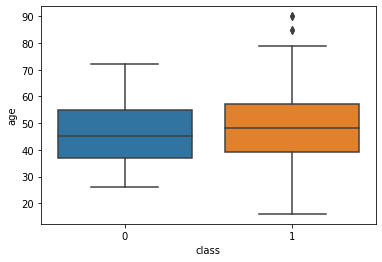

In [21]:
# is there a relationship between age and diabetic status?
sns.boxplot(df['class'], df['age'])

In [22]:
no_diabetes = df[df['class']==0]
print(no_diabetes['age'].mean())

diabetes = df[df['class']==1]
print(diabetes['age'].mean())

46.36
49.071875


(array([  1.,  44.,  83., 103.,  91., 118.,  46.,  29.,   1.,   4.]),
 array([16. , 23.4, 30.8, 38.2, 45.6, 53. , 60.4, 67.8, 75.2, 82.6, 90. ]),
 <BarContainer object of 10 artists>)

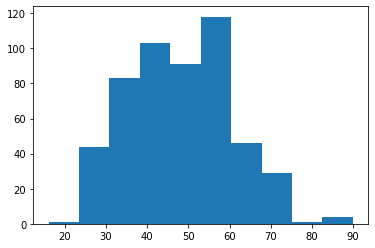

In [23]:
plt.hist(df['age'])

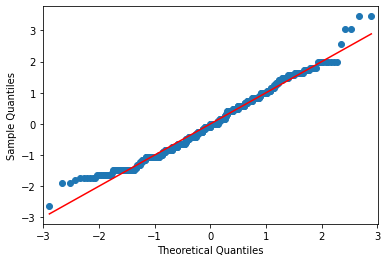

In [24]:
qqplot(df['age'], fit=True, line='s')
plt.show()

In [25]:
# conduct z test 
ztest(diabetes['age'],no_diabetes['age'])

(2.4882300316303065, 0.012838066562901769)

With a p valor of less than 0.05 we must reject the null hypothesis we must reject the hypothesis that there is no difference between ages of people with and without diabetes

<AxesSubplot:>

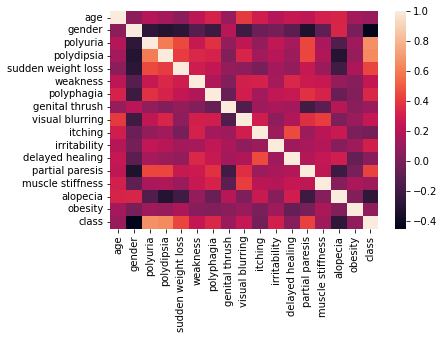

In [26]:
sns.heatmap(df.corr())

### Part III : Machine Learning Model training

In [31]:
#importing specific libraries
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report

In [32]:
#prepare independent and dependant variables

X = df.drop('class', axis=1)
y = df['class']

In [43]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y)

In [44]:
# begin model training
# start with DummyClassifier to establish Baseline

dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

In [45]:
# assess DummyClassifier Model
confusion_matrix(y_test, dummy_pred)

array([[ 0, 40],
       [ 0, 64]])

In [46]:
# use classification report

print(classification_report(y_test,dummy_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.62      1.00      0.76        64

    accuracy                           0.62       104
   macro avg       0.31      0.50      0.38       104
weighted avg       0.38      0.62      0.47       104



/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/martacasquilho/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [48]:
# Start with Logistic Regression
logr = LogisticRegression(max_iter = 10000)
logr.fit(X_train, y_train)
logr_pred = logr.predict(X_test)

In [49]:
confusion_matrix(y_test, logr_pred)

array([[35,  5],
       [ 4, 60]])

In [50]:
print(classification_report(y_test,logr_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        40
           1       0.92      0.94      0.93        64

    accuracy                           0.91       104
   macro avg       0.91      0.91      0.91       104
weighted avg       0.91      0.91      0.91       104



In [51]:
#  DecisionTree

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

In [52]:
confusion_matrix(y_test, tree_pred)

array([[38,  2],
       [ 5, 59]])

In [53]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92        40
           1       0.97      0.92      0.94        64

    accuracy                           0.93       104
   macro avg       0.93      0.94      0.93       104
weighted avg       0.94      0.93      0.93       104



In [54]:
# RandomForest

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

In [55]:
confusion_matrix(y_test, forest_pred)

array([[39,  1],
       [ 0, 64]])

In [56]:
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.98      1.00      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



In [58]:
#getting model feature importance
forest.feature_importances_

array([0.09625197, 0.09329645, 0.22810759, 0.18051682, 0.05103509,
       0.01537344, 0.03128668, 0.02037574, 0.02913779, 0.02722403,
       0.05805992, 0.03167533, 0.05774699, 0.02386559, 0.03845548,
       0.0175911 ])

In [59]:
X.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden weight loss',
       'weakness', 'polyphagia', 'genital thrush', 'visual blurring',
       'itching', 'irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'alopecia', 'obesity'],
      dtype='object')

In [62]:
pd.DataFrame({'feature': X.columns,
             'importance': forest.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
2,polyuria,0.228108
3,polydipsia,0.180517
0,age,0.096252
1,gender,0.093296
10,irritability,0.058060
12,partial paresis,0.057747
4,sudden weight loss,0.051035
14,alopecia,0.038455
11,delayed healing,0.031675
6,polyphagia,0.031287


Summary:

1. Trained baseline model
2. Trained different models - logistic regression, decision tree, random forest
3. Identified the important features in the best performing model (Random Forest)